# Data Science with Cars
This is a group project within the course Data Science at DHBW Stuttgart on data of cars. The group members are Felix Waldbach and Niklas Wolf.

The observed dataset "Auto-Mpg Data" was taken from the StatLib library which ismaintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

**Tasks**:

Part 1
* Analyze given data with stasticial standard functions
* **Diagrams** for visualization of correlation of the data, **Comment** to highlight interesting correlation

Part 2
* **Prediction** of horsepower with a given dataset without horsepower with **two different approaches**

Part 3
* **Classification** of a vehicle with a certain number of cylinders with the other data  with **two classification methods**

Regarding Part 2 and 3
* Validation and Testing of the Results with evaluation methods
* Compare results and describe end result
* Choose one approach 
* Optimize in maximum 3 iterations and comment on additional optimizations
* Metho for inserting data and giving the result optically and logically

### Reading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
colnames = ['mpg','cylinders','displacement','horsepower','weight','acceleration','modelyear','origin','carname']
# given data is separated by either 2 or more spaces or tabs, hence this separator
df = pd.read_csv('auto-mpg.data-original',sep='\t+|\s\s+', header=None, engine='python',names=colnames)

### Analyzing the raw data

#### MIssing values

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       406 non-null float64
displacement    406 non-null float64
horsepower      400 non-null float64
weight          406 non-null float64
acceleration    406 non-null float64
modelyear       406 non-null float64
origin          406 non-null float64
carname         406 non-null object
dtypes: float64(8), object(1)
memory usage: 28.6+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,"""chevrolet chevelle malibu"""
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,"""buick skylark 320"""
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,"""plymouth satellite"""
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,"""amc rebel sst"""
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,"""ford torino"""


In [4]:
df.isnull().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
modelyear       0
origin          0
carname         0
dtype: int64

From this first peak we can already see that there are missing values within the data. The value mpg is missing 8 times and the value horsepower is missing 6 times.

#### Some Visualizations

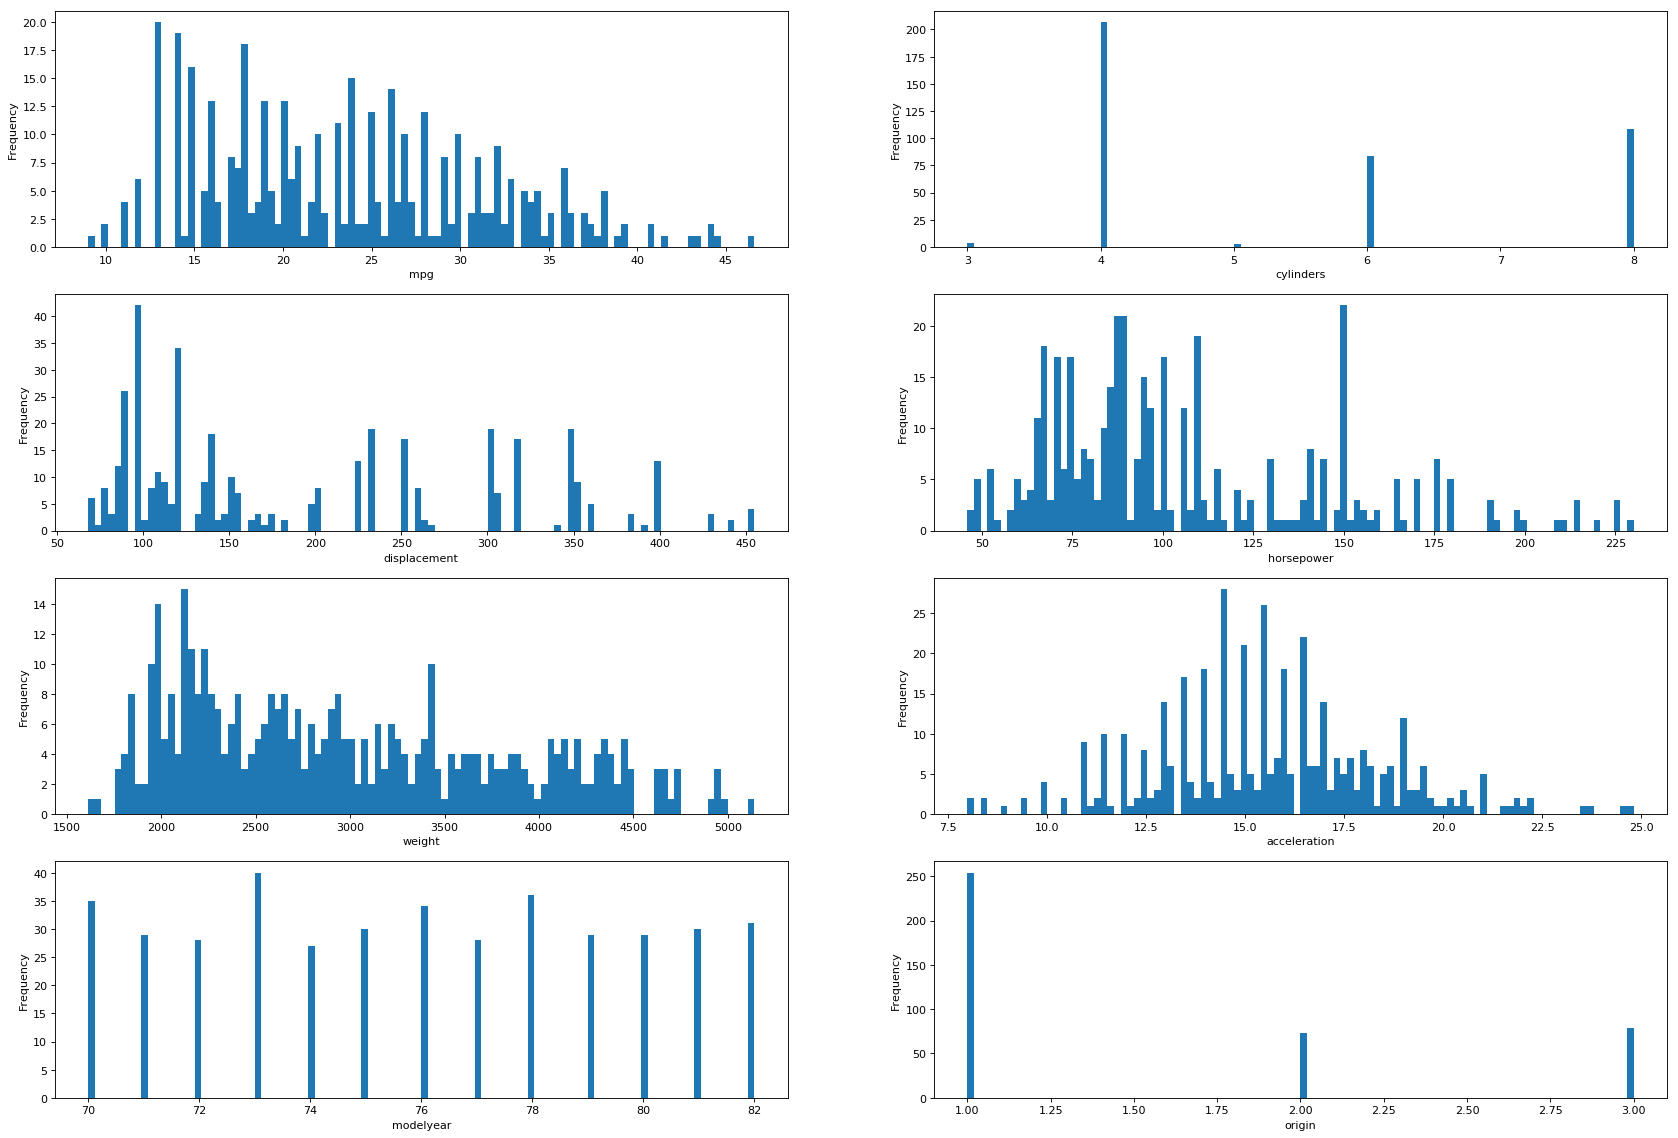

In [5]:
# adjusting jupyter plot size
fig=plt.figure(figsize=(26, 18), dpi= 80, facecolor='w', edgecolor='k')

# plot some of the interesting 
plt.subplot(4, 2, 1)
df['mpg'].plot(kind='hist', bins=100)
plt.xlabel('mpg')

plt.subplot(4, 2, 2)
df['cylinders'].plot(kind='hist', bins=100)
plt.xlabel('cylinders')

plt.subplot(4, 2, 3)
df['displacement'].plot(kind='hist', bins=100)
plt.xlabel('displacement')

plt.subplot(4, 2, 4)
df['horsepower'].plot(kind='hist', bins=100)
plt.xlabel('horsepower')

plt.subplot(4, 2, 5)
df['weight'].plot(kind='hist', bins=100)
plt.xlabel('weight')

plt.subplot(4, 2, 6)
df['acceleration'].plot(kind='hist', bins=100)
plt.xlabel('acceleration')

plt.subplot(4, 2, 7)
df['modelyear'].plot(kind='hist', bins=100)
plt.xlabel('modelyear')

plt.subplot(4, 2, 8)
df['origin'].plot(kind='hist', bins=100)
plt.xlabel('origin')
plt.show()

In both horsepower and acceleration there seem to exist common values that occur more frequently. Cylinder values are with few exceptions mostly within the subset of {4,6,8}.

#### Description of the Dataset

In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


#### Standard Deviation Coefficient

In [7]:
print("Standard Deviation Coefficient for mpg: {}".format(df.describe()['mpg']['std'] / df.describe()['mpg']['mean']))
print("Standard Deviation Coefficient for cylinders: {}".format(df.describe()['cylinders']['std'] / df.describe()['cylinders']['mean']))
print("Standard Deviation Coefficient for displacement: {}".format(df.describe()['displacement']['std'] / df.describe()['displacement']['mean']))
print("Standard Deviation Coefficient for horsepower: {}".format(df.describe()['horsepower']['std'] / df.describe()['horsepower']['mean']))
print("Standard Deviation Coefficient for weight: {}".format(df.describe()['weight']['std'] / df.describe()['weight']['mean']))
print("Standard Deviation Coefficient for acceleration: {}".format(df.describe()['acceleration']['std'] / df.describe()['acceleration']['mean']))
print("Standard Deviation Coefficient for modelyear: {}".format(df.describe()['modelyear']['std'] / df.describe()['modelyear']['mean']))
print("Standard Deviation Coefficient for origin: {}".format(df.describe()['origin']['std'] / df.describe()['origin']['mean']))

Standard Deviation Coefficient for mpg: 0.3323889554645019
Standard Deviation Coefficient for cylinders: 0.31270211894228644
Standard Deviation Coefficient for displacement: 0.5386728473147292
Standard Deviation Coefficient for horsepower: 0.3689365896615061
Standard Deviation Coefficient for weight: 0.28428556322050363
Standard Deviation Coefficient for acceleration: 0.1806322297151364
Standard Deviation Coefficient for modelyear: 0.04937669874951624
Standard Deviation Coefficient for origin: 0.5082833182507628


As you can see from the above data, most of the dimensions deviate around the same value of 30%. However, the origin and displacement deviate with around 50%. The origin probably deviates that high because it only has the values 1.,2.,3. As you can see on the figure above, most of the values are 1.0.
Also, most of the displacement numbers are rather lower than higher, but they have a big span length.

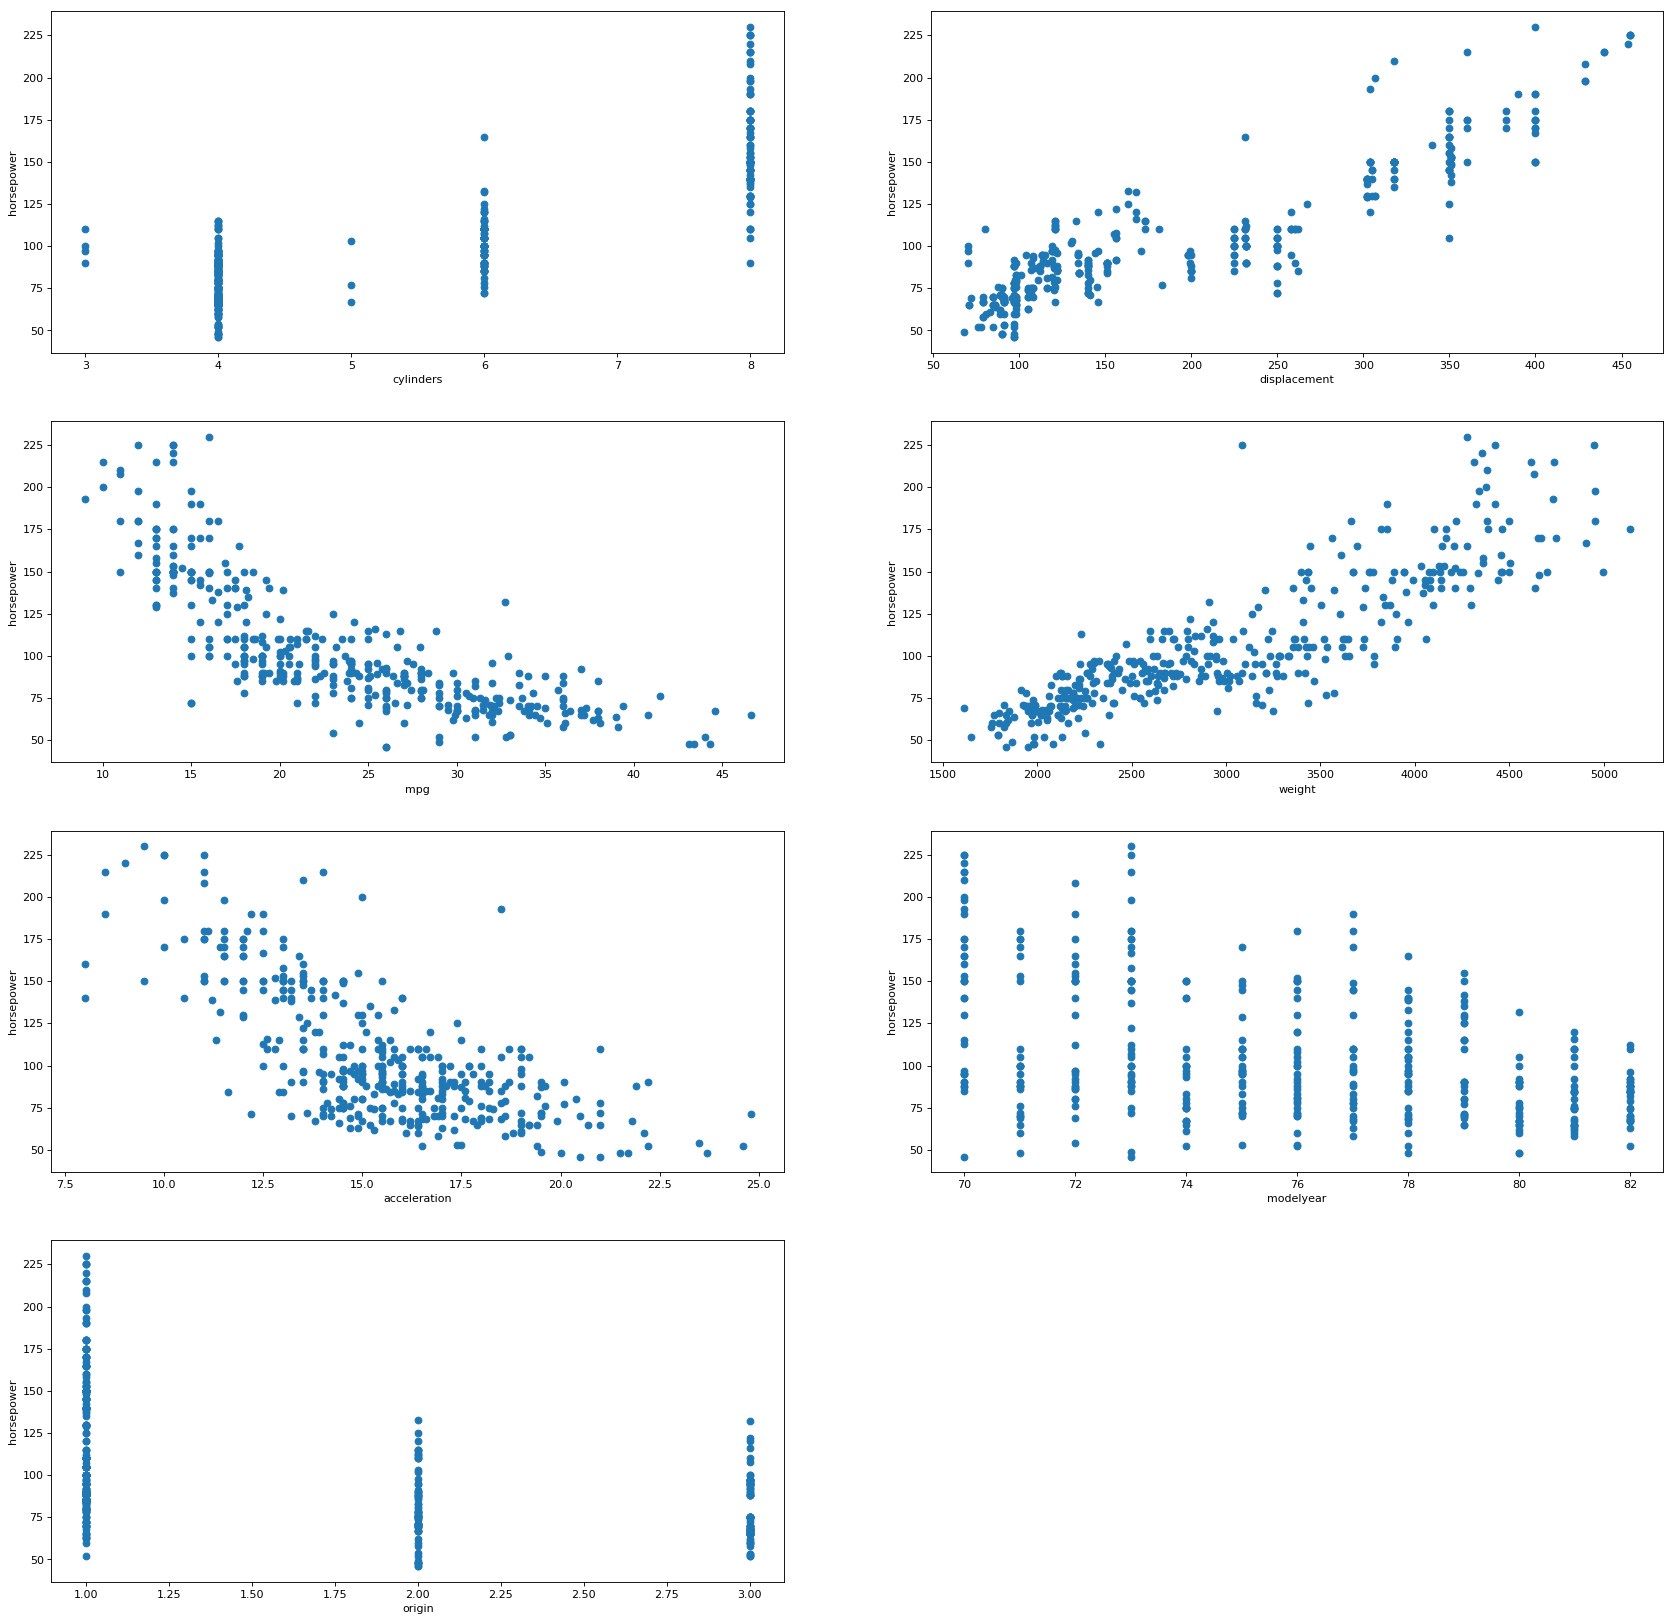

In [8]:
fig = plt.figure(figsize=(26, 26), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(421)
plt.scatter(df['cylinders'], df['horsepower'])
plt.xlabel('cylinders')
plt.ylabel('horsepower')

plt.subplot(422)
plt.scatter(df['displacement'], df['horsepower'])
plt.xlabel('displacement')
plt.ylabel('horsepower')

plt.subplot(423)
plt.scatter(df['mpg'], df['horsepower'])
plt.xlabel('mpg')
plt.ylabel('horsepower')

plt.subplot(424)
plt.scatter(df['weight'], df['horsepower'])
plt.xlabel('weight')
plt.ylabel('horsepower')

plt.subplot(425)
plt.scatter(df['acceleration'], df['horsepower'])
plt.xlabel('acceleration')
plt.ylabel('horsepower')

plt.subplot(426)
plt.scatter(df['modelyear'], df['horsepower'])
plt.xlabel('modelyear')
plt.ylabel('horsepower')

plt.subplot(427)
plt.scatter(df['origin'], df['horsepower'])
plt.xlabel('origin')
plt.ylabel('horsepower')

plt.show()

From the above figures you can tell the dependencies of the horsepower values from the other values.

Plot 1 indicates that a lower amount of cylinders tends to lead to a lower horsepower value while more cylinders tend to lead to higher horsepower. Since cylinder values are not a continuous function, the values are strictly separated from each other into the cylinder values.

Plot 2 indicates that a higher amount of displacements done by a car lead to a higher amount to horsepower.

According to Plot 3 a higher amount of miles per gallon usually means that the horsepower is lower.

Plot 4 shows that the more weight a car has, the more horsepower it has too.

Plot 5 indicates that the points of acceleration and horsepower are more scattered than the plots before. However, the trend also shows that the higher the acceleration, the lower the horsepower value.

Plot 6 contains a non-continuous function (modelyear) on the x-axis again. The plot shows that a lower modelyear tends to lead to higher horsepower, however the values are highly distributed per each category (modelyear).

Plot 7 uses a non-continuous function (origin) on the x-axis. It shows that the cars from origin 1 have more high horsepower values than origin 2 and 3 which are almost the same

## Regression

#### Data Preparation

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# we are predicting horsepower, so values with missing horsepower are useless for this case and we are dropping those
reg_df = df.dropna(subset=['horsepower']).copy()
X = reg_df [['mpg','cylinders','displacement','weight','acceleration','modelyear','origin']].copy()
y = reg_df ['horsepower'].copy()

# imputing values where NaN occures
imp = preprocessing.Imputer(missing_values=0, strategy='mean', axis=0)
X = imp.fit_transform(X)
#print(np.where(np.isnan(X)))

# Splitting the data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


### Linear Regression

#### Fitting the Model

In [10]:
from sklearn.linear_model import LinearRegression

# creating the model
lr = LinearRegression(normalize=True)

# fitting model to training data
lr.fit(X_train, y_train)

# predicting for test data
y_pred_lr = lr.predict(X_test)

#### Evaluating the Results

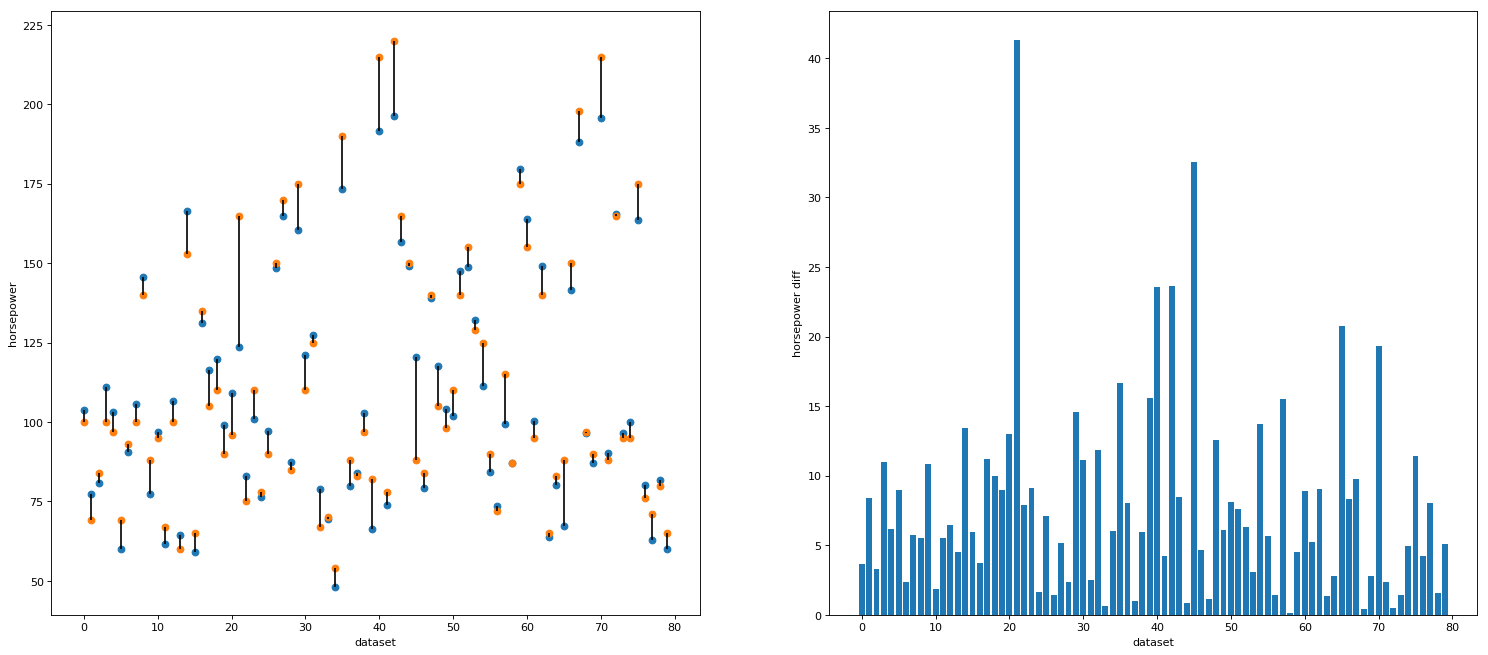

R2 Score:
0.9304329010217345


In [11]:
x_plot = np.arange(len(y_pred_lr))
fig = plt.figure(figsize=(23, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121)
plt.scatter(x_plot,y_pred_lr)
plt.scatter(x_plot,y_test)
plt.vlines(x_plot,y_test,y_pred_lr)
plt.xlabel('dataset')
plt.ylabel('horsepower')

plt.subplot(122)
plt.bar(x_plot,np.abs(y_pred_lr-y_test))
plt.xlabel('dataset')
plt.ylabel('horsepower diff')

plt.show()
print("R2 Score:")
print(r2_score(y_test,y_pred_lr))

From the above R2 Score you can tell that the Linear Regression is a good regression method for this case. The predicted values are already pretty close to the correct values as you can tell from the left plot. The plot on the right shows that most of the predicted values are only different up to 20 from the actual horsepower value, however a few datasets are further away from the correct value with one even over 40 off.

### Lasso

#### Fitting the Model

In [12]:
# creating the model
reg = linear_model.Lasso(alpha=0.7)

# fitting model to training data
reg.fit(X_train, y_train)

# predicting for test data
y_pred_la = reg.predict(X_test)

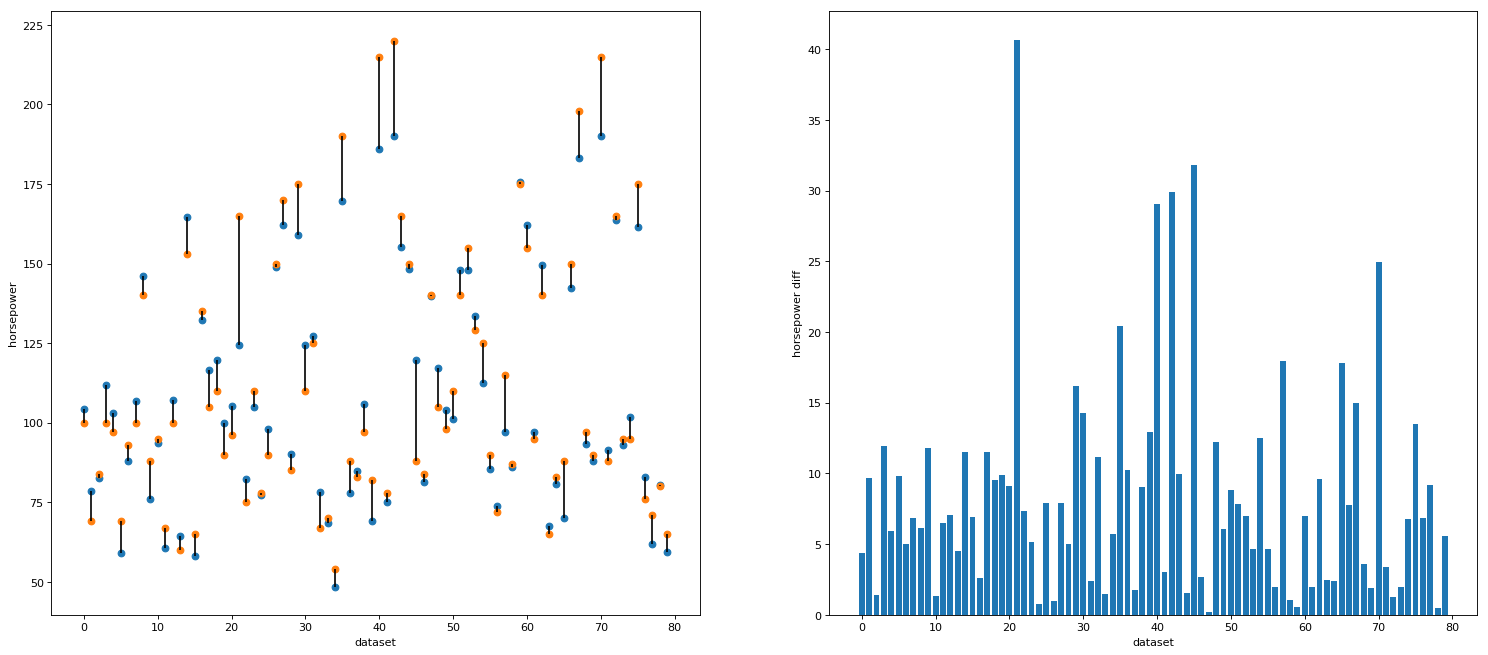

R2 Score:
0.9210123256997839


In [13]:
x_plot = np.arange(len(y_pred_la))
fig = plt.figure(figsize=(23, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121)
plt.scatter(x_plot,y_pred_la)
plt.scatter(x_plot,y_test)
plt.vlines(x_plot,y_test,y_pred_la)
plt.xlabel('dataset')
plt.ylabel('horsepower')

plt.subplot(122)
plt.bar(x_plot,np.abs(y_pred_la-y_test))
plt.xlabel('dataset')
plt.ylabel('horsepower diff')

plt.show()
print("R2 Score:")
print(r2_score(y_test,y_pred_la))

From the above R2 Score you can tell that the Lasso Regression is also a good regression method for this case with a similar score to linear regression. The predicted values are already pretty close to the correct values as you can tell from the left plot. The plot on the right however show that there are more datasets that are more off from the correct value than with linear regression. The highest value is around 40 again.

In [14]:
#looking at outliers
#y_test.iloc[[21]]
#y_test.iloc[[45]]
df.iloc[[270]]
df.iloc[[55]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
55,18.0,6.0,250.0,88.0,3139.0,14.5,71.0,1.0,"""ford mustang"""


#### searching for best alpha

Text(0, 0.5, 'R2 Score')

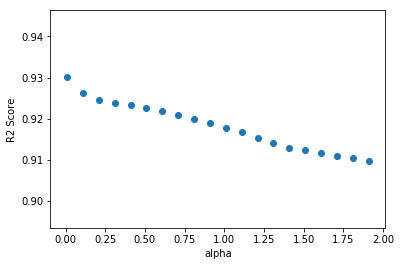

In [15]:
# creating the model
alphas = np.arange(0.01,2,0.1)
r2_results = []
for a in alphas:
    reg = linear_model.Lasso(alpha=a)

    # fitting model to training data
    reg.fit(X_train, y_train)

    # predicting for test data
    y_pred_la = reg.predict(X_test)
    
    r2_results.append(r2_score(y_test,y_pred_la))
    


plt.scatter(alphas,r2_results)
plt.xlabel('alpha')
plt.ylabel('R2 Score')

It is evident that the closer alpha is to 0 the better the R2 Scores for our Model Predictions become.
Because the R2 Score values get worse if we increase alpha we conclude that Linear Regression is better suited for this problem than Lasso. as alpha = 0 is equivalent to Linear Regression.

## Classification

For Classification we want to predict the number of cylinders of the data.

In [16]:
df['cylinders'].value_counts()

4.0    207
8.0    108
6.0     84
3.0      4
5.0      3
Name: cylinders, dtype: int64

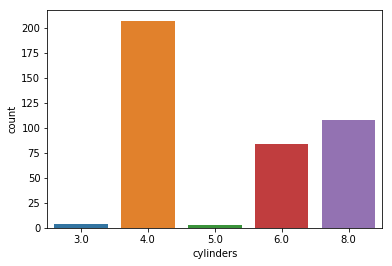

In [17]:
sns.countplot(df['cylinders'])

From inspecting the unique values of cylinders we can see that there are only 5 different options for the number of cylinders. Also the numbers 3 and 5 seem to be especially rare.

### Preparing the Data

In [18]:
X = df.drop(['cylinders','carname'],axis=1)
y = df['cylinders']

In [19]:
# imputing values where NaN occures
imp = preprocessing.Imputer(missing_values=0, strategy='mean', axis=0)
X = imp.fit_transform(X)
#print(np.where(np.isnan(X)))

# Splitting the data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=24)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Random Forest Classifier

In [21]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)

In [22]:
print(classification_report(y_test,y_pred_rfc))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_rfc))

              precision    recall  f1-score   support

         3.0       1.00      1.00      1.00         1
         4.0       1.00      1.00      1.00        49
         6.0       1.00      1.00      1.00        11
         8.0       1.00      1.00      1.00        21

   micro avg       1.00      1.00      1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82

Confusion Matrix:
[[ 1  0  0  0]
 [ 0 49  0  0]
 [ 0  0 11  0]
 [ 0  0  0 21]]


### SVM Classifier

In [23]:
clf = SVC()
clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)

In [24]:
print(classification_report(y_test,y_pred_clf))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_clf))

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.96      1.00      0.98        49
         6.0       0.83      0.91      0.87        11
         8.0       1.00      0.90      0.95        21

   micro avg       0.95      0.95      0.95        82
   macro avg       0.70      0.70      0.70        82
weighted avg       0.94      0.95      0.95        82

Confusion Matrix:
[[ 0  1  0  0]
 [ 0 49  0  0]
 [ 0  1 10  0]
 [ 0  0  2 19]]


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Insert Data to test
In the following, you can enter an index of a dataset and get the regression and classification result of this dataset.

In [42]:
x = input("Enter an index for an entry to perform regression: ")

# we are predicting horsepower, so values with missing horsepower are useless for this case and we are dropping those
reg_df = df.dropna(subset=['horsepower']).copy()
X_Reg = reg_df [['mpg','cylinders','displacement','weight','acceleration','modelyear','origin']].copy()

# imputing values where NaN occures
imp = preprocessing.Imputer(missing_values=0, strategy='mean', axis=0)
X_Reg = imp.fit_transform(X_Reg)

x_pred_la = reg.predict([X_Reg[int(x)]])
# X_Reg = sc.transform(X_Reg)
x_pred_lr = lr.predict([X_Reg[int(x)]])

print("Predicted Horsepower with linear regression: {}".format(x_pred_la))
print("Predicted Horsepower with lass regression: {}"x_pred_lr)

Enter an index for an entry to perform regression: 2
[61058.20663508]
[69262.94264888]


/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [38]:
x = input("Enter an index for an entry to perform classification: ")

X_Class = df.drop(['cylinders','carname'],axis=1)
# imputing values where NaN occures
imp = preprocessing.Imputer(missing_values=0, strategy='mean', axis=0)
X_Class = imp.fit_transform(X_Class)

x_pred_clf = clf.predict([X_Class[int(x)]])
x_pred_rfc = rfc.predict([X_Class[int(x)]])

print(x_pred_clf)
print(x_pred_rfc)

Enter an index for an entry to perform classification: 10
[4.]
[8.]


/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
